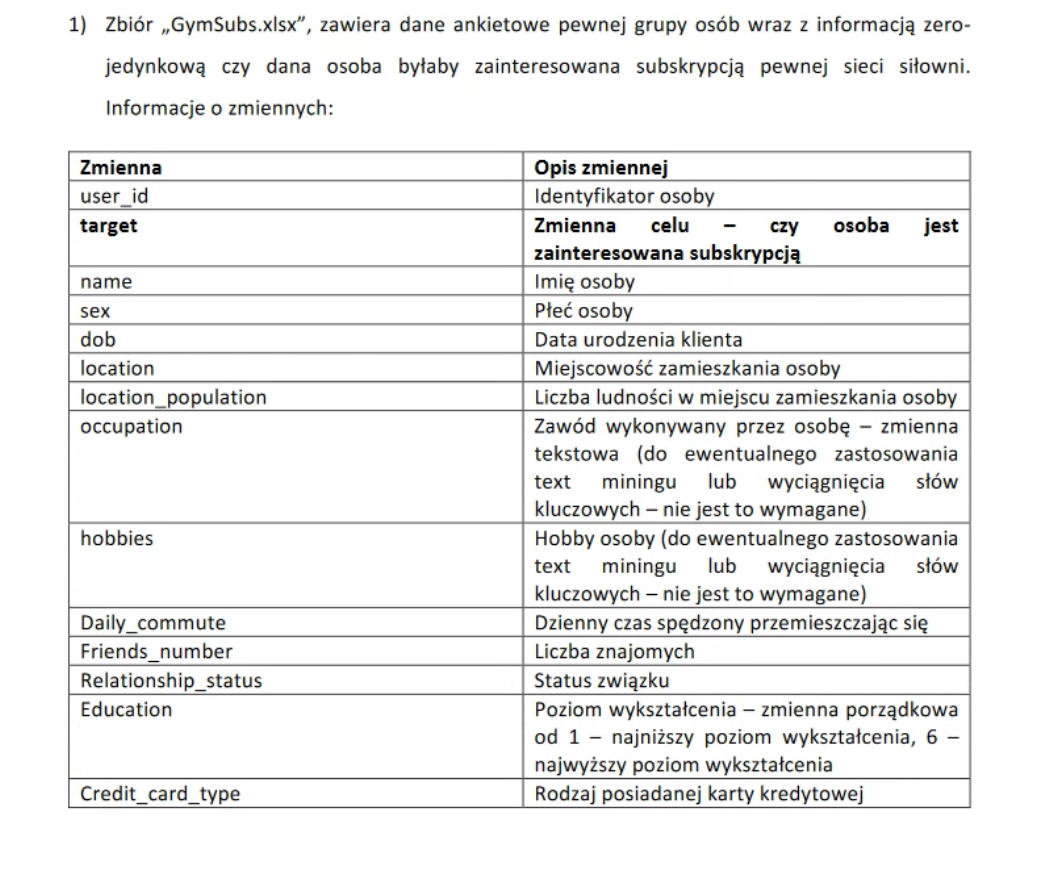
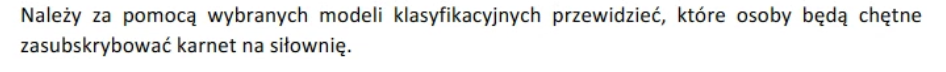
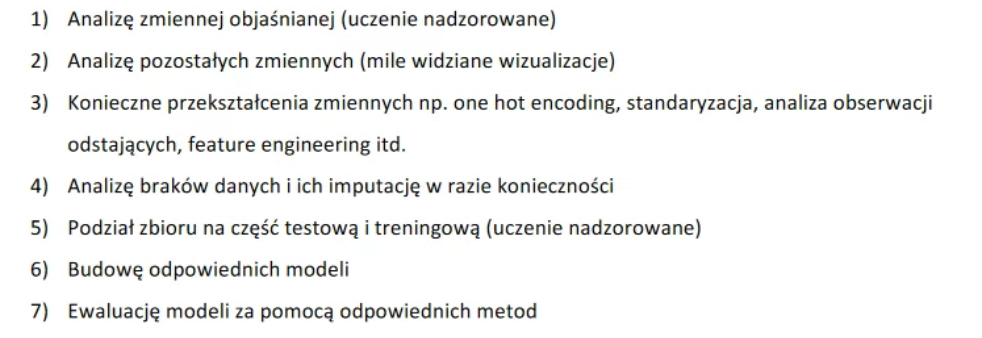

# Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We start the analyzed dataset *GymSubs.csv*.

In [2]:
# Importing a dataset
df =  pd.read_excel('data/GymSubs.xlsx')

# Descriptive analysis of the data

In [3]:
# Display a preview of the data
df.head()

,user_id,target,name,sex,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN


In [4]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              4000 non-null   int64         
 1   target               4000 non-null   int64         
 2   name                 3982 non-null   object        
 3   sex                  3616 non-null   object        
 4   dob                  3606 non-null   datetime64[ns]
 5   location             4000 non-null   object        
 6   location_population  4000 non-null   int64         
 7   occupation           4000 non-null   object        
 8   hobbies              3320 non-null   object        
 9   daily_commute        3595 non-null   float64       
 10  friends_number       4000 non-null   int64         
 11  relationship_status  3607 non-null   object        
 12  education            3592 non-null   float64       
 13  credit_card_type     3572 non-nul

The dataset consists of 13 variables, eight of which have missing data.

In [5]:
NA = pd.DataFrame(data=[df.notna().sum().tolist(),
            df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (df.isna().sum()/df.shape[0]*100).tolist()]], 
           columns=df.columns, index=['Not NA Count', 'NA Count', 'NA Percent']).transpose()
NA

,Not NA Count,NA Count,NA Percent
user_id,4000,0,0.00%
target,4000,0,0.00%
name,3982,18,0.45%
sex,3616,384,9.60%
dob,3606,394,9.85%
location,4000,0,0.00%
location_population,4000,0,0.00%
occupation,4000,0,0.00%
hobbies,3320,680,17.00%
daily_commute,3595,405,10.12%


In [6]:
# Basic statistics of numeric columns
df.describe()

,user_id,target,dob,location_population,daily_commute,friends_number,education
count,4000.000000,4000.000000,3606,4.000000e+03,3595.000000,4000.000000,3592.000000
mean,1999.500000,0.201500,1979-01-23 11:32:50.715474240,3.105877e+05,50.098748,199.877750,3.670935
min,0.000000,0.000000,1922-05-27 00:00:00,7.860000e+02,0.000000,0.000000,1.000000
25%,999.750000,0.000000,1969-06-28 06:00:00,2.435725e+04,25.000000,143.000000,3.000000
50%,1999.500000,0.000000,1979-07-03 12:00:00,8.007200e+04,50.000000,199.000000,4.000000
75%,2999.250000,0.000000,1989-05-05 00:00:00,3.523130e+05,75.000000,256.000000,5.000000
max,3999.000000,1.000000,2001-11-10 00:00:00,1.764615e+06,99.000000,619.000000,6.000000
std,1154.844867,0.401171,NaN,4.878360e+05,28.806060,90.494937,1.327582


In [7]:
# General statistics of qualitative variables
df.describe(include=['O'])

,name,sex,location,occupation,hobbies,relationship_status,credit_card_type
count,3982,3616,4000,4000,3320,3607,3572
unique,208,2,645,43,2745,5,4
top,Franciszek,female,Warszawa,Science and engineering associate professionals,Gym,In relationship,Visa
freq,38,2040,332,106,20,1247,1777


We have 6 categorical variables, three of which have very unique values.

# Target variable

In [8]:
# A look at the variable we are going to predict
df['target'].value_counts()

target
0    3194
1     806
Name: count, dtype: int64

In [9]:
# Representation of the abundance of the explanatory variable in percentage form
df['target'].value_counts(normalize=True)

target
0    0.7985
1    0.2015
Name: proportion, dtype: float64

As you can see, only about 20% of customers are our target. 

<Axes: xlabel='target', ylabel='count'>

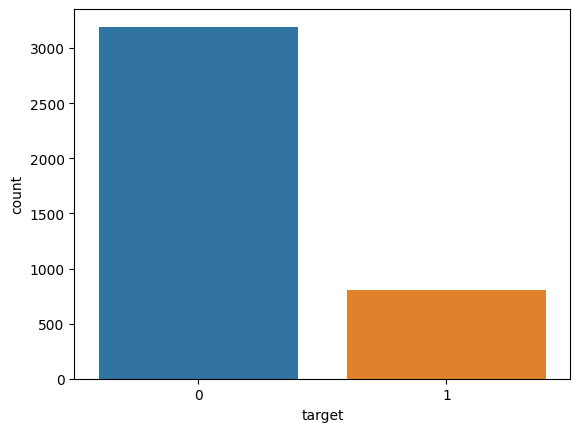

In [10]:
sns.countplot(x = 'target', data=df)

#### Categorical variables

/home/barto/python/Gym Subscription/GymSub_env/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/home/barto/python/Gym Subscription/GymSub_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


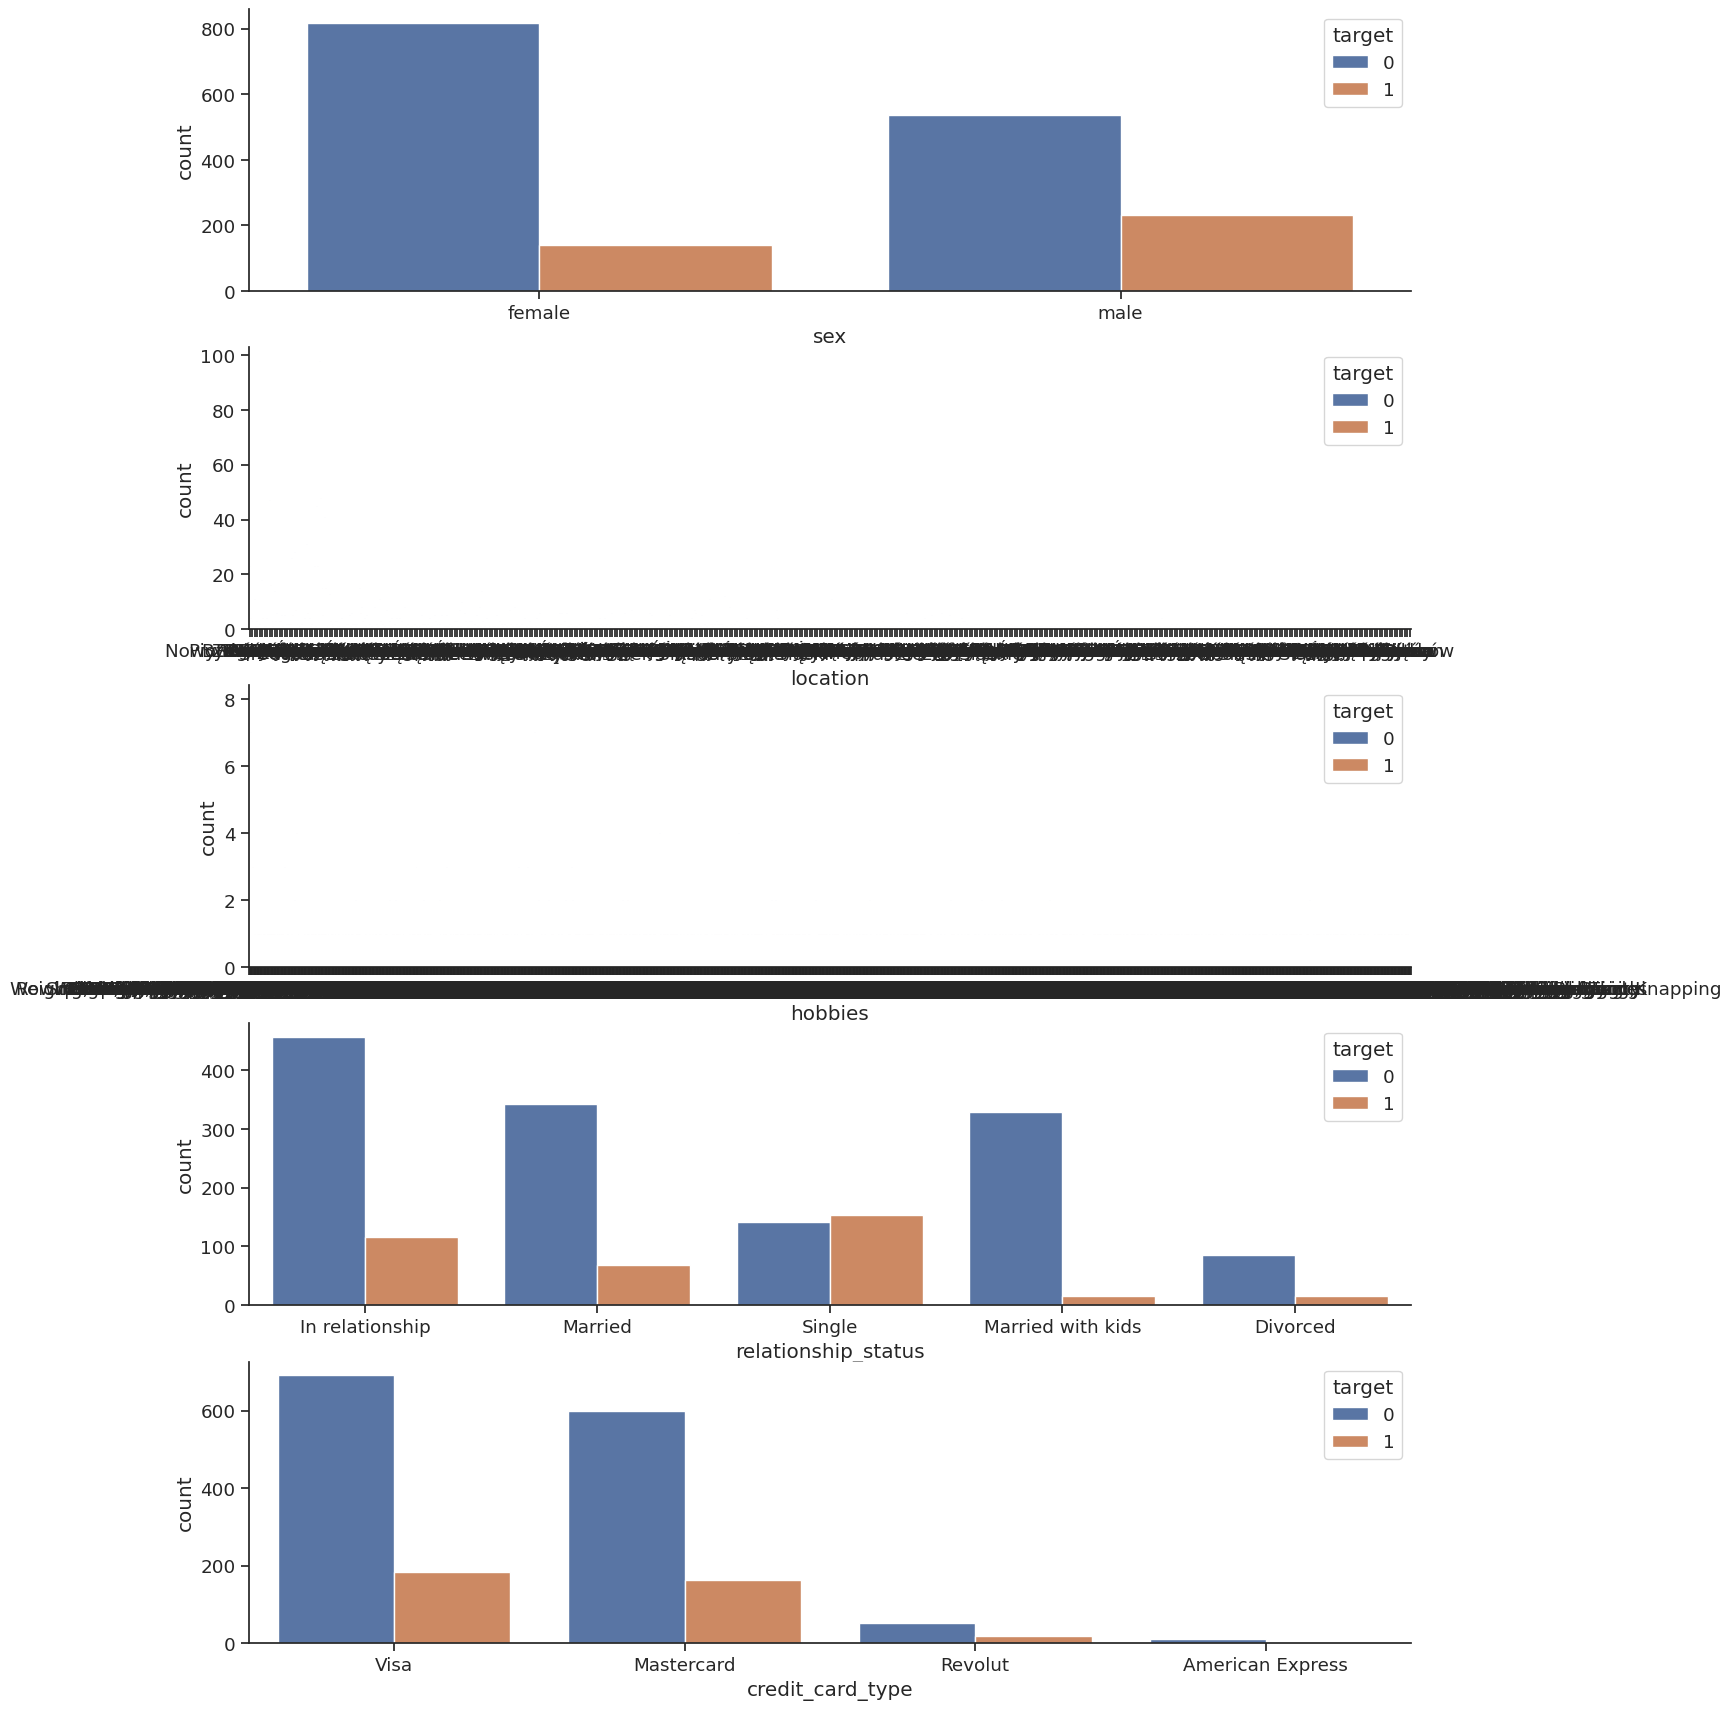

In [45]:
char_cols = ['sex', 'location', 'hobbies', 'relationship_status', 'credit_card_type']

plt.figure(figsize=(15, 30))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(char_cols):
    plt.subplot(7, 1, i+1)
    sns.countplot(data=df, x=feature, hue='target')  
    
sns.despine()

# użyć biblioteki warnings (zarzączanie błęami)
# ocupation - obrócić o 90 stopni
#opis

In [12]:
# Share of people who are targeted for each relationship status
df[['relationship_status','target']].groupby(['relationship_status'], as_index=False).mean().sort_values(by='target')

,relationship_status,target
3,Married with kids,0.042724
2,Married,0.149398
0,Divorced,0.178571
1,In relationship,0.185245
4,Single,0.512821


The table above shows that 51% of the people we target are singles

In [13]:
df['relationship_status'].value_counts()

relationship_status
In relationship      1247
Married               830
Married with kids     749
Single                585
Divorced              196
Name: count, dtype: int64

In [14]:
# Share of people who are targeted by sex
df[['sex','target']].groupby(['sex'], as_index=False).mean().sort_values(by='target')

,sex,target
0,female,0.139706
1,male,0.282995


In [15]:
df['sex'].value_counts()

sex
female    2040
male      1576
Name: count, dtype: int64

In [16]:
# Share of people who are targeted by occupation
df[['occupation','target']].groupby(['occupation'], as_index=False).mean().sort_values(by='target')

,occupation,target
6,Business and administration professionals,0.106383
29,Numerical and material recording clerks,0.123711
30,Other clerical support workers,0.144578
7,"Chief executives, senior officials and legisla...",0.147368
8,Cleaners and helpers,0.156627
19,"Hospitality, retail and other services managers",0.164835
9,Commissioned armed forces officers,0.168831
37,Science and engineering associate professionals,0.169811
17,Health associate professionals,0.171429
36,Sales workers,0.178947


In [17]:
df['occupation'].value_counts()

occupation
Science and engineering associate professionals                                      106
Health associate professionals                                                       105
Information and communications technology professionals                              104
General and keyboard clerks                                                          103
Food processing, wood working, garment and other craft and related trades workers    103
Information and communications technicians                                           103
Legal, social, cultural and related associate professionals                          102
Handicraft and printing workers                                                      101
Refuse workers and other elementary workers                                          101
Armed forces occupations, other ranks                                                100
Non-commissioned armed forces officers                                               100
Protective

In [18]:
# Share of people who are targeted by credit card type
df[['credit_card_type','target']].groupby(['credit_card_type'], as_index=False).mean().sort_values(by='target')

,credit_card_type,target
1,Mastercard,0.194011
0,American Express,0.200000
3,Visa,0.211030
2,Revolut,0.229299


In [19]:
df['credit_card_type'].value_counts()

credit_card_type
Visa                1777
Mastercard          1603
Revolut              157
American Express      35
Name: count, dtype: int64

#### Quantitative variables

In [20]:
num_cols = ['location_population', 'daily_commute', 'friends_number', 'education']

/tmp/ipykernel_3220464/1971193562.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
/tmp/ipykernel_3220464/1971193562.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['target'] == 0], color="red", shade=True)
/tmp/ipykernel_3220464/1971193562.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
/tmp/ipykernel_3220464/1971193562.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update you

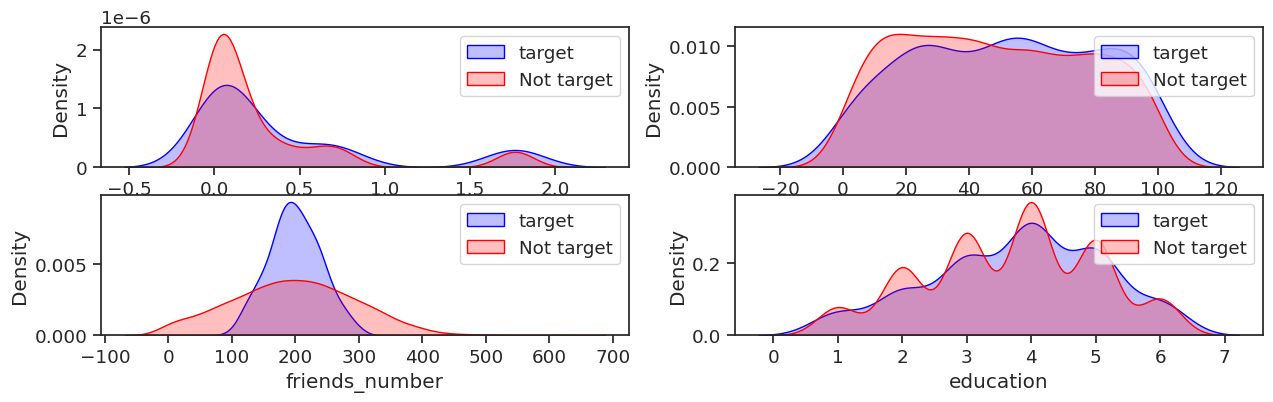

In [46]:
plt.figure(figsize=(15, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
    sns.kdeplot(df[feature][df['target'] == 0], color="red", shade=True)
    plt.legend(['target', 'Not target'])
    ax.set(xlabel=feature)
    # plt.xlim(-10,85) 

# Skalowanie, rozkład, rozsunąć, powiększyć
# interpretacja
# error



In [22]:
# Wartości średnie i mediany zmiennych ilościowych w podziale na zmienną celu
df.groupby('target').agg({'location_population': ['mean', 'median'],
                           'daily_commute': ['mean', 'median'],
                           'friends_number': ['mean', 'median'],
                           'education': ['mean', 'median']})

location_population           daily_commute        friends_number   
                      mean    median          mean median           mean   
target                                                                     
0            287938.329368   74312.0     50.027206   50.0     200.512210  \
1            400341.964020  113621.0     50.380495   50.5     197.363524   

              education         
       median      mean median  
target                          
0       200.0  3.665391    4.0  
1       196.0  3.693166    4.0

# Feature engineering, data cleaning

In [23]:
df.head(20)

,user_id,target,name,sex,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN
5,5,1,Bronisława,NaN,1976-10-09,Ryn,2865,Street and related sales and service workers,"Rowing,Amateur radio,Sudoku",44.0,204,In relationship,3.0,Mastercard
6,6,0,Agata,female,1981-03-19,Warszawa,1764615,"Labourers in mining, construction, manufacturi...","Gym,3D printing,Gaming,Flag Football",56.0,117,Married with kids,NaN,Mastercard
7,7,0,Jakub,male,1978-02-24,Dobra,2353,Administrative and commercial managers,"Crossfit,3D printing,Coloring,Hooping",74.0,224,In relationship,4.0,Visa
8,8,1,Antoni,male,NaT,Gniezno,68943,Personal care workers,"Badminton,Listening to music",9.0,181,In relationship,4.0,Mastercard
9,9,0,Dorota,female,1985-02-17,Warszawa,1764615,"Market-oriented skilled forestry, fishery and ...",Kettleballs,78.0,187,In relationship,NaN,Visa


In [24]:


# Rozdzielanie hobby i tworzenie kolumn
hobby_columns = df['hobbies'].str.get_dummies(',')

# Łączenie nowych kolumn z oryginalnym dataframe
df_encoded = pd.concat([df, hobby_columns], axis=1)

# Wyświetlanie zdekodowanego dataframe
hobby_columns.head()

,3D printing,Acting,Air sports,Amateur radio,Archery,Astronomy,BASE jumping,Backpacking,Badminton,Baseball,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
hobby_columns.sum().sort_values(ascending=False)

Squash             253
Gym                249
Bodybuilding       249
Rowing             229
Cardio             229
                  ... 
Mountaineering      24
Gunsmithing         24
Swimming            23
Watching movies     23
Scrapbooking        23
Length: 174, dtype: int64

In [26]:
# df[['target', 'location_population', 'daily_commute', 'friends_number', 'education']].corr().style.background_gradient(cmap="Pastel1_r")

In [27]:
# df[['target', 'location_population', 'daily_commute', 'friends_number', 'education']].corr(method='spearman').style.background_gradient(cmap="Pastel1_r")

In [28]:
# # dzielenie kolumny na osobne kolumny
# hobbies_df = df['hobbies'].str.get_dummies(',')

# # połączenie z pierwotnym DataFrame
# df = pd.concat([df, hobbies_df], axis=1)

# # usunięcie pierwotnej kolumny
# df.drop('hobbies', axis=1, inplace=True)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

# skopiować, nie pracować na głównym dataframe

In [31]:
df.count()

index                  1726
user_id                1726
target                 1726
name                   1726
sex                    1726
dob                    1726
location               1726
location_population    1726
occupation             1726
hobbies                1726
daily_commute          1726
friends_number         1726
relationship_status    1726
education              1726
credit_card_type       1726
dtype: int64

In [32]:
X = df[['target', 'location_population', 'daily_commute', 'friends_number', 'education']]
y = df['target']
 
model = LogisticRegression()
model.fit(X, y)

pred = model.predict(X)

In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y, pred)
print(r2)


-0.3175835127162556


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# tworzenie modelu w odzielnym notebooku
# picle - użyć, podele importujemy z odzielnych plików

In [ ]:
# najpierw podział
# potem uzupełnianie anych 


In [35]:
# podział zbioru na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# tworzenie modelu regresji logistycznej i dopasowanie do zbioru treningowego
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# predykcja dla zbioru testowego
y_pred = model.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[400,   5],
       [113,   0]])

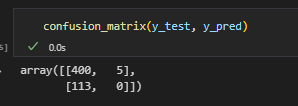
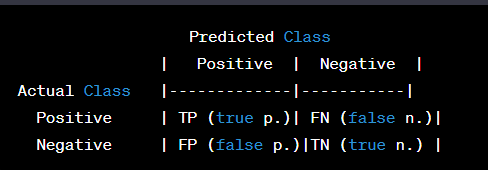

In [37]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_percent = np.round(cm * 100, 2)
print(cm_percent)

[[ 98.77   1.23]
 [100.     0.  ]]


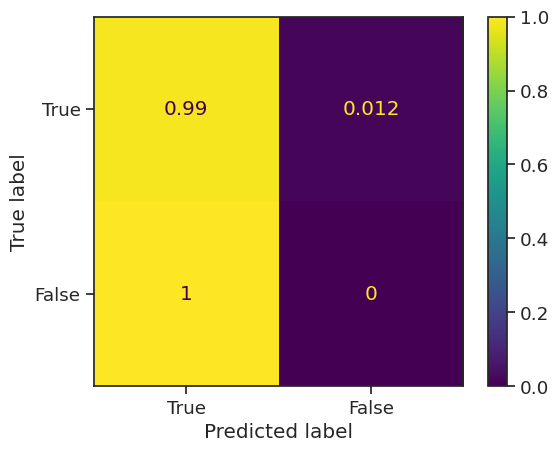

In [38]:
confusion_matrix = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [39]:
hobby_columns = df['hobbies'].str.get_dummies(',')

# Łączenie nowych kolumn z oryginalnym dataframe
# df_encoded = pd.concat([df, hobby_columns], axis=1)

# Wyświetlanie zdekodowanego dataframe
# print(df_encoded)

In [40]:
hobby_columns

,3D printing,Acting,Air sports,Amateur radio,Archery,Astronomy,BASE jumping,Backpacking,Badminton,Baseball,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
hobby_columns.sum().sort_values(ascending=False)

Squash             136
Bodybuilding       131
Gym                127
Cardio             122
Kettleballs        122
                  ... 
Yoga                12
Swimming            11
Hunting             11
Watching movies     10
Scrapbooking         9
Length: 174, dtype: int64

In [47]:
# Modelowanie 